<h1>Module 16 Project Template</h1>

Use the code below to help you analyze the data returned by the MBTA API:

In [98]:
mbtaURL = "https://api-v3.mbta.com/vehicles?filter[route]=1&include=trip"

import urllib.request, json
with urllib.request.urlopen(mbtaURL) as url:
    data = json.loads(url.read().decode())
   
    with open('data.json', 'w') as outfile:
        json.dump(data, outfile)
   
    with open('data.txt', 'w') as outfile:
        json.dump(json.dumps(data, indent=4, sort_keys=True), outfile)
       
    print(json.dumps(data, indent=4, sort_keys=True))


{
    "data": [
        {
            "attributes": {
                "bearing": 125,
                "current_status": "IN_TRANSIT_TO",
                "current_stop_sequence": 7,
                "direction_id": 1,
                "label": "1914",
                "latitude": 42.3646485,
                "longitude": -71.10252298,
                "occupancy_status": "MANY_SEATS_AVAILABLE",
                "speed": null,
                "updated_at": "2023-05-01T23:23:29-04:00"
            },
            "id": "y1914",
            "links": {
                "self": "/vehicles/y1914"
            },
            "relationships": {
                "route": {
                    "data": {
                        "id": "1",
                        "type": "route"
                    }
                },
                "stop": {
                    "data": {
                        "id": "72",
                        "type": "stop"
                    }
                },
                "trip

Use the code below to read the data from your MySQL database and store it in a pandas dataframe.  

You you need to install pymysql to run the code:

pip install pymysql

In [99]:
import os
import pymysql
import pandas as pd

host = '127.0.0.1'
port = '3306'
user = 'root'
password = 'MyNewPass'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses",
    conn)

df.tail(10)



/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,record_num,id,latitude,longitude,current_status,bearing,current_stop_sequence,direction_id,label
14415,14431,y1801,-71.075505,42.335186,IN_TRANSIT_TO,159,18,1,1801
14416,14432,y1784,-71.088320,42.347671,IN_TRANSIT_TO,259,13,0,1784
14417,14433,y1905,-71.089839,42.351548,IN_TRANSIT_TO,156,11,1,1905
14418,14434,y1820,-71.114829,42.371526,IN_TRANSIT_TO,319,23,0,1820
14419,14435,y1801,-71.075471,42.335179,IN_TRANSIT_TO,0,18,1,1801
14420,14436,y1784,-71.088241,42.347658,IN_TRANSIT_TO,173,13,0,1784
14421,14437,y1905,-71.089426,42.350739,IN_TRANSIT_TO,163,11,1,1905
14422,14438,y1820,-71.115527,42.372120,IN_TRANSIT_TO,315,23,0,1820
14423,14439,y1801,-71.075461,42.335187,IN_TRANSIT_TO,0,18,1,1801
14424,14440,y1784,-71.088339,42.348106,IN_TRANSIT_TO,339,13,0,1784



The code below saves the data as a csv file to the local directory as a backup.

In [100]:

df.to_csv('mbta.csv')

<h1>What is the average time it takes for a bus to complete the route</h1>

To calculate the average I needed to use a different method than most. I mistakenly left out the updated_at column from my dataset and inly realized after I gathered my data. It took me quite a bit of time (hence 14k entries to the database) to gather a few hours of consistent data due to internet connectivity and laptop power issues so I just kept it and performed my analysis with the technique showed below. I counted how many data aqcuisitions the server needed for the bus to reach its final stop and multiplied by 10seconds. I then back calculated minutes from seconds and appeneded that calculation to a list. I took the average time taken from each entry in the list and calculated the average to be 35.6 minutes to complete the route with no bias on direction. 

In [101]:
import os
import pymysql
import pandas as pd
import numpy as np

host = '127.0.0.1'
port = '3306'
user = 'root'
password = 'MyNewPass'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses WHERE id = 'y1820' ORDER BY 'record_num' ASC" ,
    conn)
count = 1
minutes = []
for i in range(len(df)-1):
    if df['current_stop_sequence'][i] != 23:
        count = count + 1
    if df['current_stop_sequence'][i] == 23:
        minutes.append(((count*10)/60))
        count = 1
        



print(minutes)
print(np.average(minutes))

df.tail(10)

[26.5, 56.0, 24.5]
35.666666666666664


/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,record_num,id,latitude,longitude,current_status,bearing,current_stop_sequence,direction_id,label
633,14391,y1820,-71.095136,42.360493,IN_TRANSIT_TO,0,16,0,1820
634,14397,y1820,-71.099501,42.362839,IN_TRANSIT_TO,309,17,0,1820
635,14403,y1820,-71.099908,42.363228,IN_TRANSIT_TO,310,17,0,1820
636,14409,y1820,-71.100535,42.363576,IN_TRANSIT_TO,305,17,0,1820
637,14415,y1820,-71.100792,42.363818,IN_TRANSIT_TO,276,18,0,1820
638,14421,y1820,-71.100836,42.363834,IN_TRANSIT_TO,307,18,0,1820
639,14426,y1820,-71.113232,42.370477,IN_TRANSIT_TO,284,22,0,1820
640,14430,y1820,-71.113537,42.370596,IN_TRANSIT_TO,314,22,0,1820
641,14434,y1820,-71.114829,42.371526,IN_TRANSIT_TO,319,23,0,1820
642,14438,y1820,-71.115527,42.372120,IN_TRANSIT_TO,315,23,0,1820


<h1>Provide a Visualization based on the data</h1>

I chose to provide a visualization of three bus lines that were running at the same time. You can see the shift in current stop for each in their respective positions on the route. There are three things that I would like to discuss about the graph. The first is that when a bus reaches the end of its route, it does not go to the start. The direction id changes. That is why when the indiviidual buses are finished with a route and need to go back, it starts from stop 1. The second point is about the seemingly inconsistent stop positions. Each bus has a portion where it seems to jump back to previous stops a few times. This is because my server had stopped running twice while my computer charger was in a faulty wall socket. Whe unplugged, my computer went to sleep and stopped the api calls. I chose to include this to highlight the importance of error logging and data tracking. When something leads to inconsistencies, a clear record of the server health will help immensely during troubleshooting. The third point is about how the later route runs take more records to get to the final stop. I was running my server in the afternoon EST so the buses likely took longer due to increased traffic along the route. 

/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


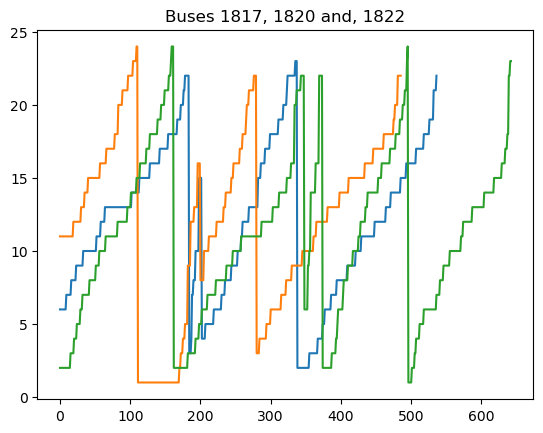

In [102]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt


host = '127.0.0.1'
port = '3306'
user = 'root'
password = 'MyNewPass'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df1 = pd.read_sql_query("SELECT * FROM mbta_buses WHERE id = 'y1817' ORDER BY 'record_num' ASC" ,
    conn)
df2 = pd.read_sql_query("SELECT * FROM mbta_buses WHERE id = 'y1822' ORDER BY 'record_num' ASC" ,
    conn)
df3 = pd.read_sql_query("SELECT * FROM mbta_buses WHERE id = 'y1820' ORDER BY 'record_num' ASC" ,
    conn)
fig, ax = plt.subplots(nrows = 1, ncols= 1, sharex = True)
ax.plot(df1['current_stop_sequence'])
ax.plot(df2['current_stop_sequence'])
ax.plot(df3['current_stop_sequence'])
ax.set_title("Buses 1817, 1820 and, 1822")

plt.savefig("lines.png")
plt.show()



<h1>Give an estimate of the speed of the bus from current_stop_sequence = 1 to the last  current_stop_sequence. </h1> 

Note: You can use the haversine Python library to calculate the distance between two points, given two longitude and latitude coordinates.

In order to calculate the average speed, I used my findings from question 1 and the haversine python data. I first found the first location of the bus and the last location and set their latitude and longitude to lists. I then used the haversine tool to calculate the direct distance between these two points. For the final anser it is important to keep in mind that the distance is a linear calculation that doesnt take into account any turns the buses need to make. Also, for the average time, this includes all stoplights, bus stops and waiting for pedestrians to turn. After getting these values (time is 35.6 minutes and distance is 2.3 miles) I simply converted the time to hours and divided the distance by that number. This came out to be 3.8 miles per hour. This seems slow but it is important to keep the previous points in mind while making conclusions about such a small speed. 

In [103]:
import os
import pymysql
import pandas as pd
import numpy as np
from haversine import haversine, Unit

host = '127.0.0.1'
port = '3306'
user = 'root'
password = 'MyNewPass'
database = 'MBTAdb'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SELECT * FROM mbta_buses WHERE id = 'y1820' AND current_stop_sequence  = 1 AND direction_id = 1 LIMIT 1" ,
    conn)
df2 = pd.read_sql_query("SELECT * FROM mbta_buses WHERE id = 'y1820' AND current_stop_sequence  = 23 AND direction_id = 0 LIMIT 1" ,
    conn)

firststop = (df.loc[0, 'latitude'],df.loc[0, 'longitude']) 

laststop = (df2.loc[0, 'latitude'],df2.loc[0, 'longitude']) 

distance = haversine(firststop, laststop, unit = Unit.MILES)

time = 35.6 # in minutes from question one

speed = distance/(time/60) # converting to hours first
print(firststop)
print(laststop)
print(distance)
print(speed)


(-71.08427023, 42.32981101)
(-71.11482869, 42.3715256)
2.3085931381317533
3.8908873114580107


/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/pandas/io/sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
